In [1]:
import scipy.io as sio
import numpy as np
import numpy.linalg as la
import matplotlib . pyplot as plt

# 1.

## a.

At most there are three linearly independent columns, the set could be made up of any 3 of the four columns.

## b.

The matrix's rank is 3, we know this because it has three linearly independent columns.

## c.


$\begin{bmatrix}1 & 0 & 0 & 1 & 0\\1 & 1 & 0 & 0 & 0\\0 & 1 & 1 & 0 & 0\\0 & 0 & 1 & 1 &0\end{bmatrix}$
$\begin{bmatrix}1 & 1 & 0 & 0\\0 & 1 & 1 & 0\\0 & 0 & 1 & 1\\1 & 0 & 0 & 1\\0 & 0 & 0 & 0\end{bmatrix} =$
$\begin{bmatrix}2 & 1 & 0 & 1\\1 & 2 & 1 & 0\\0 & 1 & 2 & 1\\1 & 0 & 1 & 2\end{bmatrix}$


The rank of this matrix is 3 as well (it also has 3 linearly independent columns)

# 2.

## a. 

Yes, there are two linearly independent columns. If the columns are $x_1,x_2$ there is no a and b such that $ax_1 + bx_2 = 0$ except if both a and b are 0. 

## b. 

Yes, there are three linearly independent columns. If the columns are $x_1,x_2,x_3$ there is no a, b, and c such that $ax_1 + bx_2 + cx_3 = 0$ except if a,b, and c are 0. 

## c.

No, there are two linearly independent columns. If the columns are $x_1,x_2,x_3$ then $3x_2 - x_1 = x_3$ or in other words $-x_1 + 3x_2 - x_3 = 0$

## d.

The rank of the matrix is 2 since there are two linearly independent columns. Since there are only 2 columns the rank can be at most 2.

# 3.

## a. 

$\boldsymbol{w}^T(3\boldsymbol{x}) = \begin{bmatrix}3x_1w_1\\3x_2w_2\\...\\3x_iw_i\end{bmatrix}$

and df/dw of that matrix would be:

$\begin{bmatrix}3x_1\\3x_2\\...\\3x_i\end{bmatrix}$

So the gradient would be 

$3\boldsymbol{x}$

## b. 


$(w-x)^T(w-x) =$

$w^Tw - x^Tw + x^Tx - w^Tx$

$df/dw = 2w - x - x$

$= 2w - 2x$


## c.


$x^T\begin{bmatrix}1 & 2\\3 & 4\end{bmatrix}w =$ 

$\begin{bmatrix}x_1 + 3x_2 & 2x_1 + 4x_2\end{bmatrix}\begin{bmatrix}w_1\\w_2\end{bmatrix} =$

$\begin{bmatrix}w_1(x_1 + 3x_2)\\w_2(2x_1 + 4x_2)\end{bmatrix}$

df/dw of that martrix would simply be
$\begin{bmatrix}x_1 + 3x_2\\2x_1 + 4x_2\end{bmatrix}$

## d.

$w^T\begin{bmatrix}1 & 1\\-1 & 1\end{bmatrix}w$

$df/dw = \begin{bmatrix}1 & 1\\-1 & 1\end{bmatrix}w + \begin{bmatrix}1 & -1\\1 & 1\end{bmatrix}w$

$= \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix}w$

$= 2w$

## e.
$w^T\begin{bmatrix}1 & 3\\5 & 9\end{bmatrix}w$

$df/dw = \begin{bmatrix}1 & 3\\3 & 9\end{bmatrix}w + \begin{bmatrix}1 & 3\\3 & 9\end{bmatrix}w$

$= \begin{bmatrix}2 & 6\\6 & 18\end{bmatrix}w$


# 4.

## a.


In [4]:
matlab_data_file = sio.loadmat('face_emotion_data.mat')
X = matlab_data_file['X']
y = matlab_data_file['y']
n,p = np.shape(X)

In [5]:
w = la.inv(X.T@X)@X.T@y

In [6]:
print(w)

[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]]


## b.

If you were given a new face with a new vector to describe its features, lets call it $x$ you could simply use the dot product of x and w to find an estimate of y ie $\widetilde{y} = x^Tw$. Since 1 indicates smiling and -1 indicates not smiling tf $\widetilde{y}$ is above 0 then the prediction is smiling ie $\hat{y} = 1$, if $\widetilde{y}$ is 0 or below then the prediction is not smiling ie $\hat{y} = -1$

## c.

Assuming each feature is normalized then features 1, 3, and 4 would seem to be the most important since those have the largest absolute values. This means that as along as the features are normalized a 1 point change in any of those features would cause a larger change in the prediction of y. If you added 1 to feaure 1 then we'd expect our prediction for y to change by .944 vs if you added 1 to feature 9 we'd expect the prediction to decrease by only .166.

## d.

We could just use are 3 most important features removing all features except for 1, 3 and 4 so that X would be n x 3 and our W would be a vector of length 3.

## e.

In [7]:
Xs = np.split(X, 8)
ys = np.split(y, 8)

In [8]:
total_error_9 = 0
total_error_3 = 0
for idx in range(len(Xs)):
    training_X = np.concatenate(Xs[:idx] + Xs[idx+1:])
    training_y = np.concatenate(ys[:idx] + ys[idx+1:])
    test_X = Xs[idx]
    test_y = ys[idx]
    w_hat = la.inv(training_X.T@training_X)@training_X.T@training_y
    y_tilde = test_X@w_hat
    y_hat = np.where(y_tilde > 0, 1, -1)
    errors = ((y_hat - test_y)!=0).sum()
    total_error_9 = total_error_9 + errors/16
    w_hat = la.inv(training_X[:,[0,2,3]].T@training_X[:,[0,2,3]])@training_X[:,[0,2,3]].T@training_y
    y_tilde = test_X[:,[0,2,3]]@w_hat
    y_hat = np.where(y_tilde > 0, 1, -1)
    errors = ((y_hat - test_y)!=0).sum()
    total_error_3 = total_error_3 + errors/16
    
avg_error_9 = total_error_9/8
avg_error_3 = total_error_3/8

## f.

In [9]:
print(f"The average error using 9 features was {avg_error_9}")
print(f"The average error using 3 features was {avg_error_3}")

The average error using 9 features was 0.046875
The average error using 3 features was 0.078125


# 5.


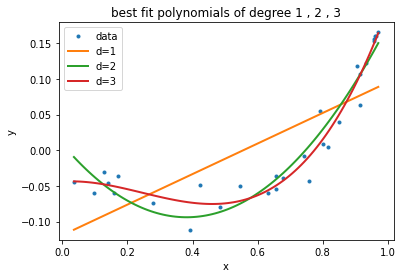

In [10]:
# load x and y vectors
d = sio.loadmat('polydata.mat')
z = d['x']
y = d['y']
# n = number of data points
# N = number of points to use for interpolation
# z = points where interpolant is evaluated
# p = array to store the values of the interpolated polynomials
n = z.size
N = 100
z_test = np.linspace(np.min(z), np.max(z), N)
p = np.zeros((3 , N ) )
for d in [1 , 2 , 3]:
    X = np.zeros((n,d + 1))
    for i in range(n):
        for j in range(d + 1):
            X[i, j] = z[i]**j
            
    w = la.inv(X.T@X)@X.T@y
    
    X_test = np.zeros((N, d+1))
    for i in range(N):
        for j in range(d + 1):
            X_test[i, j] = z_test[i]**j
            
    p[d-1] = (X_test@w).T
    
# generate X- matrix for this choice of d
# solve least - squares problem . w is the list
# of polynomial coefficients
# evaluate best -fit polynomial at all points z_test ,
# and store the result in p
# NOTE ( optional ): this can be done in one line
# with the polyval command !
# plot the datapoints and the best -fit polynomials
plt.plot(z, y, '.', z_test, p[0,:], z_test, p[1,:], z_test, p[2,:], linewidth=2)
plt.legend(['data', 'd=1', 'd=2', 'd=3'], loc='upper left')
plt.title('best fit polynomials of degree 1 , 2 , 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()